In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest 
from sklearn import datasets

In [35]:
#get train data 0 only 
zeros_only = datasets.load_digits(n_class=1)
zeros_only

{'data': array([[0., 0., 5., ..., 0., 0., 0.],
        [0., 0., 1., ..., 3., 0., 0.],
        [0., 0., 3., ..., 4., 0., 0.],
        ...,
        [0., 0., 9., ..., 4., 0., 0.],
        [0., 0., 5., ..., 8., 1., 0.],
        [0., 0., 6., ..., 6., 0., 0.]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  

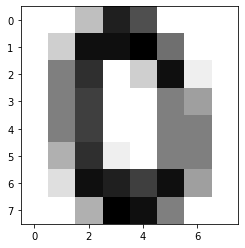

In [36]:
plt.imshow(zeros_only.images[10], cmap=plt.cm.binary)

In [37]:
train_data = zeros_only.images.reshape(zeros_only.images.shape[0], -1) #pominięcie ostatniego wymiaru czyli scalenie go z poprzednim

In [38]:
rnd_state = 42
contamination = 0

classifier = IsolationForest(random_state=rnd_state, contamination= contamination)


In [39]:
classifier.fit(train_data)

IsolationForest(contamination=0, random_state=42)

In [40]:
prediction = classifier.predict(train_data)

In [45]:
test_images = datasets.load_digits(n_class=10)


In [55]:
def pick_random_test_images(count):
    rand_indices = np.random.randint(0,test_images.images.shape[0]-1, [count])
    images = test_images.images[rand_indices]
    labels = test_images.target[rand_indices]
    
    return images, labels

In [56]:
def show_results(images, labels, is_anomaly):
    plt.figure(figsize=(20, 20))
    
    N= images.shape[0]
    
    for i in range(N):
        plt.subplot(1, N, i+1)
        
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
        
        if(is_anomaly[i] == -1):
            plt.title('ANOMALY')
        else:
            plt.title('NORMAL')

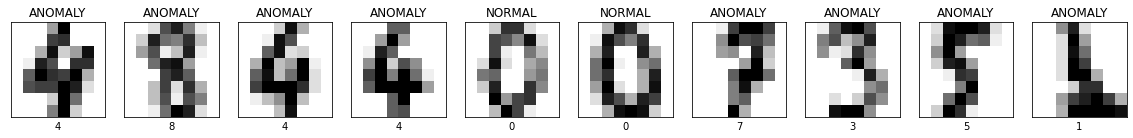

In [66]:
images_to_test, labels = pick_random_test_images(10)

images_to_test_reshaped = images_to_test.reshape(images_to_test.shape[0], -1)
is_anomaly = classifier.predict(images_to_test_reshaped)

show_results(images_to_test, labels, is_anomaly)

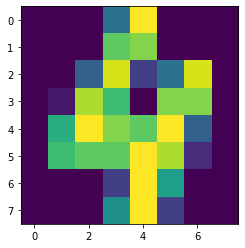

In [67]:
plt.imshow(images_to_test[0])